In [2]:
import numpy as np
import pandas as pd
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import entr, rel_entr, kl_div, xlogy

def entropy_ls(p):
    return [entr(arr).sum() for arr in p]
def kl_ls(p,q):
    return [kl_div(arrp,arrq).sum() for (arrp,arrq) in zip(p, q)]
def ce_ls(p,q):
    return [-np.sum(xlogy(arrp, arrq)) for arrp, arrq in zip(p, q)]

In this demo, we assume a categorical target with $k=5$, and a test datapoint with 3rd class as true label i.e [0, 0, 1, 0, 0]

Given 1 prediction distribution p, there are 4 cases:
1. p is confidently correct
2. p is doubtfully correct
3. p is doubtfully incorrect
4. p is confidently incorrect

,Case,Class1,Class2,Class3,Class4,Class5
0,Confidently Correct,0.010,0.04,0.90,0.04,0.010
1,Doubtfully Correct,0.175,0.20,0.25,0.20,0.175
2,Doubtfully Incorrect,0.175,0.25,0.20,0.20,0.175
3,Confidently Incorrect,0.010,0.90,0.04,0.04,0.010


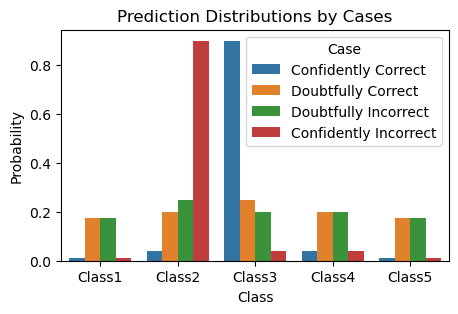

In [3]:
# case 1: confidently correct
cc = np.array([0.01, 0.04, 0.9, 0.04, 0.01])
# case 2: doubtfully correct
dc = np.array([0.175, 0.2, 0.25, 0.2, 0.175])
# case 3: doubtfully incorrect
di = np.array([0.175, 0.25, 0.2, 0.2, 0.175])
# case 4: confidently incorrect
ci = np.array([0.01, 0.9, 0.04, 0.04, 0.01])

# Create a DataFrame
df = {
    'Case': ['Confidently Correct','Doubtfully Correct','Doubtfully Incorrect','Confidently Incorrect'],
    'Class1': [cc[0],dc[0],di[0],ci[0]],
    'Class2': [cc[1],dc[1],di[1],ci[1]],
    'Class3': [cc[2],dc[2],di[2],ci[2]],
    'Class4': [cc[3],dc[3],di[3],ci[3]],
    'Class5': [cc[4],dc[4],di[4],ci[4]],
}

df = pd.DataFrame(df)
display(df)

df_melted = df.melt(id_vars='Case', var_name='Class', value_name='Probability')

# Plot
plt.figure(figsize=(5,3))
sns.barplot(x='Class', y='Probability', hue='Case', data=df_melted)
plt.title('Prediction Distributions by Cases')
plt.show()

In [4]:
df["entropy"] = [entr(cc).sum(),
                entr(ci).sum(),
                entr(dc).sum(),
                entr(di).sum(),]

Given 2 prediction distributions p1 and p2, there are 10 cases:
1.  p1 confidently correct, p2 confidently correct
2.  p1 confidently correct, p2 doubtfully correct
3.  p1 confidently correct, p2 doubtfully incorrect
4.  p1 confidently correct, p2 confidently incorrect
5.  p1 doubtfully correct, p2 doubtfully correct
6.  p1 doubtfully correct, p2 doubtfully incorrect
7.  p1 doubtfully correct, p2 confidently incorrect
8.  p1 doubtfully incorrect, p2 doubtfully incorrect
9.  p1 doubtfully incorrect, p2 confidently incorrect
10. p1 confidently incorrect, p2 confidently incorrect

In [5]:
# alternative cases
# case 1: confidently correct
cc2 = np.array([0.04, 0.01, 0.9, 0.01, 0.04])
# case 2: doubtfully correct
dc2 = np.array([0.2, 0.175, 0.25, 0.175, 0.2])
# case 3: doubtfully incorrect
di2 = np.array([0.2, 0.175, 0.175, 0.25, 0.2])
# case 4: confidently incorrect
ci2 = np.array([0.9, 0.004, 0.04, 0.01, 0.01])

In [12]:
p1_ls = [cc,cc,cc,cc,dc,dc,dc,di,di,ci]
p2_ls = [cc2,dc2,di2,ci2,dc2,di2,ci2,di2,ci2,ci2]
sv_ls = [np.mean([arr1,arr2],0) for (arr1,arr2) in zip(p1_ls,p2_ls)]
df_td = pd.DataFrame({
    "Case": [1,2,3,4,5,6,7,8,9,10],
    "p1": ["cc","cc","cc","cc","dc","dc","dc","di","di","ci"],
    "p2": ["cc","dc","di","ci","dc","di","ci","di","ci","ci"],
    "entropy(p1)": entropy_ls(p1_ls),
    "entropy(p2)": entropy_ls(p2_ls),
    "entropy(sv)": entropy_ls(sv_ls),
    "kl(p1||p2)": kl_ls(p1_ls,p2_ls),
    "kl(p2||p1)": kl_ls(p2_ls,p1_ls),
    "ce(p1||p2)": ce_ls(p1_ls,p2_ls),
    "ce(p2||p1)": ce_ls(p2_ls,p1_ls),
})
df_td["entropy(p1)+ce(p1||p2)"] = df_td["entropy(p1)"]+df_td["ce(p1||p2)"]
df_td["entropy(p2)+ce(p2||p1)"] = df_td["entropy(p2)"]+df_td["ce(p2||p1)"]
df_td["JS(p1,p2)"] = df_td["entropy(sv)"]+0.5*df_td["entropy(p1)"]+0.5*df_td["entropy(p2)"]
display(df_td)

,Case,p1,p2,entropy(p1),entropy(p2),entropy(sv),kl(p1||p2),kl(p2||p1),ce(p1||p2),ce(p2||p1),entropy(p1)+ce(p1||p2),entropy(p2)+ce(p2||p1),"JS(p1,p2)"
0,1,cc,cc,0.444438,0.444438,0.463712,0.083178,0.083178,0.527616,0.527616,0.972054,0.972054,0.908150
1,2,cc,dc,0.444438,1.600388,1.271000,0.974853,1.394627,1.419291,2.995015,1.863729,4.595403,2.293413
2,3,cc,di,0.444438,1.600388,1.326743,1.281594,1.628140,1.726032,3.228528,2.170470,4.828916,2.349156
3,4,cc,ci,0.444438,0.337769,0.935395,2.868721,3.938215,3.349159,4.239984,3.793597,4.577752,1.326499
4,5,dc,dc,1.600388,1.600388,1.602056,0.006677,0.006677,1.607065,1.607065,3.207453,3.207453,3.202444
5,6,dc,di,1.600388,1.600388,1.606357,0.024510,0.023412,1.624898,1.623800,3.225286,3.224188,3.206745
6,7,dc,ci,1.600388,0.337769,1.303385,2.018000,1.362317,3.654388,1.664086,5.254776,2.001855,2.272464
7,8,di,di,1.600388,1.600388,1.606357,0.024510,0.023412,1.624898,1.623800,3.225286,3.224188,3.206745
8,9,di,ci,1.600388,0.337769,1.307048,2.133129,1.370350,3.769517,1.672119,5.369905,2.009888,2.276126
9,10,ci,ci,0.444438,0.337769,0.984243,4.848944,4.050301,5.329382,4.352070,5.773820,4.689839,1.375346


In [ ]:
print(dc)
print(ci2)
print(-xlogy(dc, ci2))
print(-xlogy(ci2, dc))

[0.175 0.2   0.25  0.2   0.175]
[0.9   0.004 0.04  0.01  0.01 ]
[0.01843809 1.10429218 0.80471896 0.92103404 0.80590478]
[1.56867237 0.00643775 0.05545177 0.01609438 0.01742969]


In [ ]:
np.mean([cc,ci2],0)

array([0.455, 0.022, 0.47 , 0.025, 0.01 ])